***

# Predictive Modelling: U.S. Presidential Elections

***

The 2016 U.S. presidential election infamously proved most statisticians and pollsters very wrong. To see if I could do any better, I used county level data and election results from previous elections, to try and predict the 2016 result. I tried out several models in order of increasing complexity, from a simple logistic regression to an ensemble of gradient boosted trees.

# Contents
***
### 1. Data Cleaning & Preprocessing
    • Dataset & Summary Statistics
    • Null Values
    • Relative Vote Shares

### 2. Data Analysis & Visualization
    • Feature Analysis
    • Republican Vote Distribution
    
    
### 3. Feature Engineering
    • Train/Test Split
    • Normalization 
    
### 4. Predictive Modeling
    • Feature Engineering
    • Logistic Regression
    • Random Forest
    • Ensemble model: Random Forest, AdaBoost, XGBoost
    


<a id='preprocessing'></a>

# 1. Data Cleaning & Preprocessing
***

The following packages were imported for the analysis:

In [1]:
# data
import numpy as np
import pandas as pd

# stats
from scipy import stats
import statsmodels.api as sm

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%config InlineBackend.figure_format='retina'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### **Dataset & Summary Statistics**

The dataset contains county level demographic data from all 50 states, along with republican and democrat votes for the 2008, 2012, and 2016 elections.
The data was loaded into pandas and examined. 

In [2]:
vf = pd.read_csv('electiondata/votes.csv')
data = pd.read_csv('electiondata/data.csv')

# Viewed all columns
pd.set_option('display.max_columns', 55)
data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


Summary stats were obtained in order to understand the size of the data set, along with measures of central tendency and distribution of values for each column.

In [3]:
data.describe()

,Fips,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
count,3141.00000,3109.000000,3.109000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3133.000000,3141.000000,3141.00000,3140.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,2914.000000,3042.000000,3134.000000,2706.000000,3136.000000,3136.000000,2952.000000,2320.000000,3135.000000,3135.000000,2953.000000,1251.000000,2844.000000,1414.000000
mean,30406.52149,54.940495,4.178247e+04,16.874514,83.045893,19.013419,6.449682,74.953932,25463.387576,78.778908,8.752642,1.819596,1.106129,1.637822,7.904760,24.818609,11.468386,9.711190e+04,43.063837,15.447246,0.43144,21.091720,29.855237,17.443235,22.828797,2.116237,11.521665,16.235721,78.778908,8.752642,7.904760,1.106129,1.819596,1.637822,79.885037,0.717665,39.862846,0.083493,44.406345,0.315941,0.212722,0.305523,0.107103,354.269682,174.590733,0.179860,0.077045,257.055923,6.285803,76.112553,7.737553
std,15156.09339,172.926255,1.134574e+05,7.349563,7.533330,8.646941,3.849162,5.261211,5078.837873,19.625220,14.384847,7.418349,2.435244,1.901044,12.955106,11.889270,5.479738,3.111593e+05,14.526151,6.384713,0.03661,9.569136,6.432767,3.514847,3.484825,2.595179,3.370997,6.114629,19.625220,14.384847,12.955106,2.435244,7.418349,1.901044,19.132100,0.185027,4.922651,0.021065,20.039650,0.103104,0.063096,0.042426,0.022529,273.108568,229.263418,0.054765,0.027680,207.563047,4.659909,24.604878,2.511056
min,1001.00000,1.000000,6.400000e+01,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.100000e+01,0.000000,0.000000,0.20700,0.000000,9.050000,0.000000,5.400000,0.000000,0.000000,1.300000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.650000,0.227734,18.000000,0.030000,4.100000,0.000000,0.031000,0.131000,0.033000,37.400000,11.000000,0.031000,0.008000,0.000000,0.610000,23.300000,2.600000
25%,18181.00000,11.000000,4.847000e+03,11.400000,78.400000,13.100000,4.000000,72.300000,22332.413650,67.700000,0.400000,0.200000,0.250000,0.900000,1.450000,16.400000,7.600000,1.103000e+04,34.700000,11.000000,0.40700,14.150000,25.500000,15.200000,20.750000,0.550000,9.250000,11.650000,67.700000,0.400000,1.450000,0.250000,0.200000,0.900000,69.450000,0.543010,37.100000,0.070000,29.000000,0.248250,0.170000,0.283000,0.092000,182.550000,59.800000,0.140000,0.058000,114.620000,3.195000,59.300000,6.100000
50%,29179.00000,20.000000,1.094800e+04,15.400000,84.600000,16.900000,5.300000,75.150000,24830.888890,86.350000,1.900000,0.300000,0.450000,1.300000,2.950000,23.750000,10.250000,2.563100e+04,43.200000,14.650000,0.42900,20.200000,28.800000,17.150000,23.000000,1.

 ### **Null Values**

It's important to figure out where and how many null values are in the data set, since these could confuse our models:

In [4]:
data.isnull().sum()

State                                                            0
ST                                                               1
Fips                                                             0
County                                                           0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

Since the 'Votes' column is central to our data analysis, it will be necessary to drop all rows where the votes contain null values because they will not add any value to the analysis.

In [5]:
data = data.dropna(subset=['Votes'], axis=0)

It also seems reasonbable to drop all columns where over 10% of the data contains null values, since the absence of this much data could be statistically significant.

In [6]:
dropped_columns = []
for i in data:
    if data[str(i)].isnull().sum() > 300:
        dropped_columns.append(i)
data = data.drop(dropped_columns, axis=1)

Lastly, for the columns containing demographic information on race, it seems that they are duplicates:
'White (Not Latino) Population', 'African American Population', 'Native American Population', 'Asian American Population', 'Other Race or Races', 'Latino Population' contain the same information as 'White','Black', 'Hispanic', 'Asian', 'Amerindian', 'Other'. The additional 'White_Asian' column is a sum of the 'White' and 'Asian' populations, which is redundant so will be dropped. All the columns with confusing names were also dropped. So the only columns kept were 'White','Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', which are named appropriately and contain all the necessary information.

In [7]:
data = data.drop(['White (Not Latino) Population', 'African American Population', 'Native American Population', 'Asian American Population', 'Other Race or Races', 'Latino Population', 'White_Asian' ], axis=1)

In [8]:
data.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',

### **Relative Vote Shares**

For each election, 2 columns containing the relative vote count for each party were created.

In [9]:
# 08'
# Democrats
vf['dem_08_rel'] = (vf['Democrats 08 (Votes)'])/(vf['Democrats 08 (Votes)']+vf['Republicans 08 (Votes)'])
# Republicans
vf['rep_08_rel'] = (vf['Republicans 08 (Votes)'])/(vf['Democrats 08 (Votes)']+vf['Republicans 08 (Votes)'])

# 12'
# Democrats
vf['dem_12_rel'] = (vf['Democrats 12 (Votes)'])/(vf['Democrats 12 (Votes)']+vf['Republicans 12 (Votes)'])
# Republicans
vf['rep_12_rel'] = (vf['Republicans 12 (Votes)'])/(vf['Democrats 12 (Votes)']+vf['Republicans 12 (Votes)'])

# 16'
# Democrats
vf['dem_16_rel'] = (vf['votes16_clintonh'])/(vf['votes16_clintonh']+vf['votes16_trumpd'])
# Republicans
vf['rep_16_rel'] = (vf['votes16_trumpd'])/(vf['votes16_clintonh']+vf['votes16_trumpd'])


In [10]:
vf.head()

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,dem_08_rel,rep_08_rel,dem_12_rel,rep_12_rel,dem_16_rel,rep_16_rel
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043,0.402292,0.597708,0.403560,0.596440,0.373401,0.626599
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087,0.350556,0.649444,0.329928,0.670072,0.244004,0.755996
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159,0.330713,0.669287,0.308477,0.691523,0.261828,0.738172
3,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,8037,0.617209,0.382791,0.576138,0.423862,0.608123,0.391877
4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,13091,0.318874,0.681126,0.318966,0.681034,0.267756,0.732244


Now that the data has been cleaned and augmented, the data frames for the votes and the counties must now be joined for further analysis. 'Fips' is a unique identifier for each county, so the two frames can be merged on this column. Also an inner join was performed to only include entries where both votes and county data exist. Entries without a corresponding match will not be useful for the analysis.

In [11]:
df = pd.merge(data, vf, on='Fips', how='inner')

In [12]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,dem_08_rel,rep_08_rel,dem_12_rel,rep_12_rel,dem_16_rel,rep_16_rel
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,0.539968,36.8,0.10,47.7,0.429,0.323,0.126,747.3,0.197,0.108,449.02,82.0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,0.402292,0.597708,0.403560,0.596440,0.373401,0.626599
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,0.849006,38.5,0.07,49.0,0.179,0.328,0.135,247.2,0.239,0.053,245.83,96.8,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,0.350556,0.649444,0.329928,0.670072,0.244004,0.755996
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,0.579201,38.1,0.09,54.1,0.381,0.298,0.118,324.1,0.239,0.096,205.60,71.6,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,0.330713,0.669287,0.308477,0.691523,0.261828,0.738172
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,0.551646,33.4,0.09,41.3,0.204,0.132,0.036,190.9,0.230,0.081,123.88,42.9,13191.0,12792.0,8181.0,9411.0,8153.0,12652.0,0.617209,0.382791,0.576138,0.423862,0.608123,0.391877
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,0.527235,37.7,0.12,64.0,0.453,0.358,0.153,497.9,0.208,0.115,477.48,79.4,2595.0,2442.0,5543.0,5214.0,5021.0,1836.0,0.318874,0.681126,0.318966,0.681034,0.267756,0.732244


In [13]:
df.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',

<a id='analysis'></a>

# 2. Data Analysis and Visualization
***

### **Feature Analysis**

To see which features were correlated with the republican vote share, the data set was divided into categories containing similar columns. Below are the categories and columns included:

In [14]:
education = df[['State','Less Than High School Diploma', 'At Least High School Diploma', "At Least Bachelors's Degree", 'Graduate Degree', 'School Enrollment', 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4', 'rep_08_rel', 'rep_12_rel', 'rep_16_rel','dem_08_rel', 'dem_12_rel', 'dem_16_rel']]

employment = df[['State','Unemployment', 'Management.professional.and.related.occupations', 'Service.occupations', 'Sales.and.office.occupations', 'Farming.fishing.and.forestry.occupations', 'Construction.extraction.maintenance.and.repair.occupations', 'Production.transportation.and.material.moving.occupations', 'rep_08_rel', 'rep_12_rel', 'rep_16_rel','dem_08_rel', 'dem_12_rel', 'dem_16_rel']]

demographic = df[['State','Total Population', 'White', 'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'median_age', 'rep_08_rel', 'rep_12_rel', 'rep_16_rel','dem_08_rel', 'dem_12_rel', 'dem_16_rel']]

economic = df[['State','Median Earnings 2010', 'Gini.Coefficient', 'SIRE_homogeneity', 'Children Under 6 Living in Poverty', 'Adults 65 and Older Living in Poverty', 'Poverty.Rate.below.federal.poverty.threshold', 'Child.Poverty.living.in.families.below.the.poverty.line', 'Children.in.single.parent.households', 'Uninsured', 'rep_08_rel', 'rep_12_rel', 'rep_16_rel','dem_08_rel', 'dem_12_rel', 'dem_16_rel']]

health = df[['State','Low.birthweight', 'Teen.births', 'Adult.obesity', 'Diabetes','Sexually.transmitted.infections','Violent.crime', 'Injury.deaths', 'rep_08_rel', 'rep_12_rel', 'rep_16_rel','dem_08_rel', 'dem_12_rel', 'dem_16_rel']]

Heatmaps were used to calculate and visualize the correlations:

### Education

There seems to be a strong negative correlation between bachelors and graduate degrees, and Republican vote share. For Democrats, this correlation is positive. Both correlations are strongest in the 2016 election.

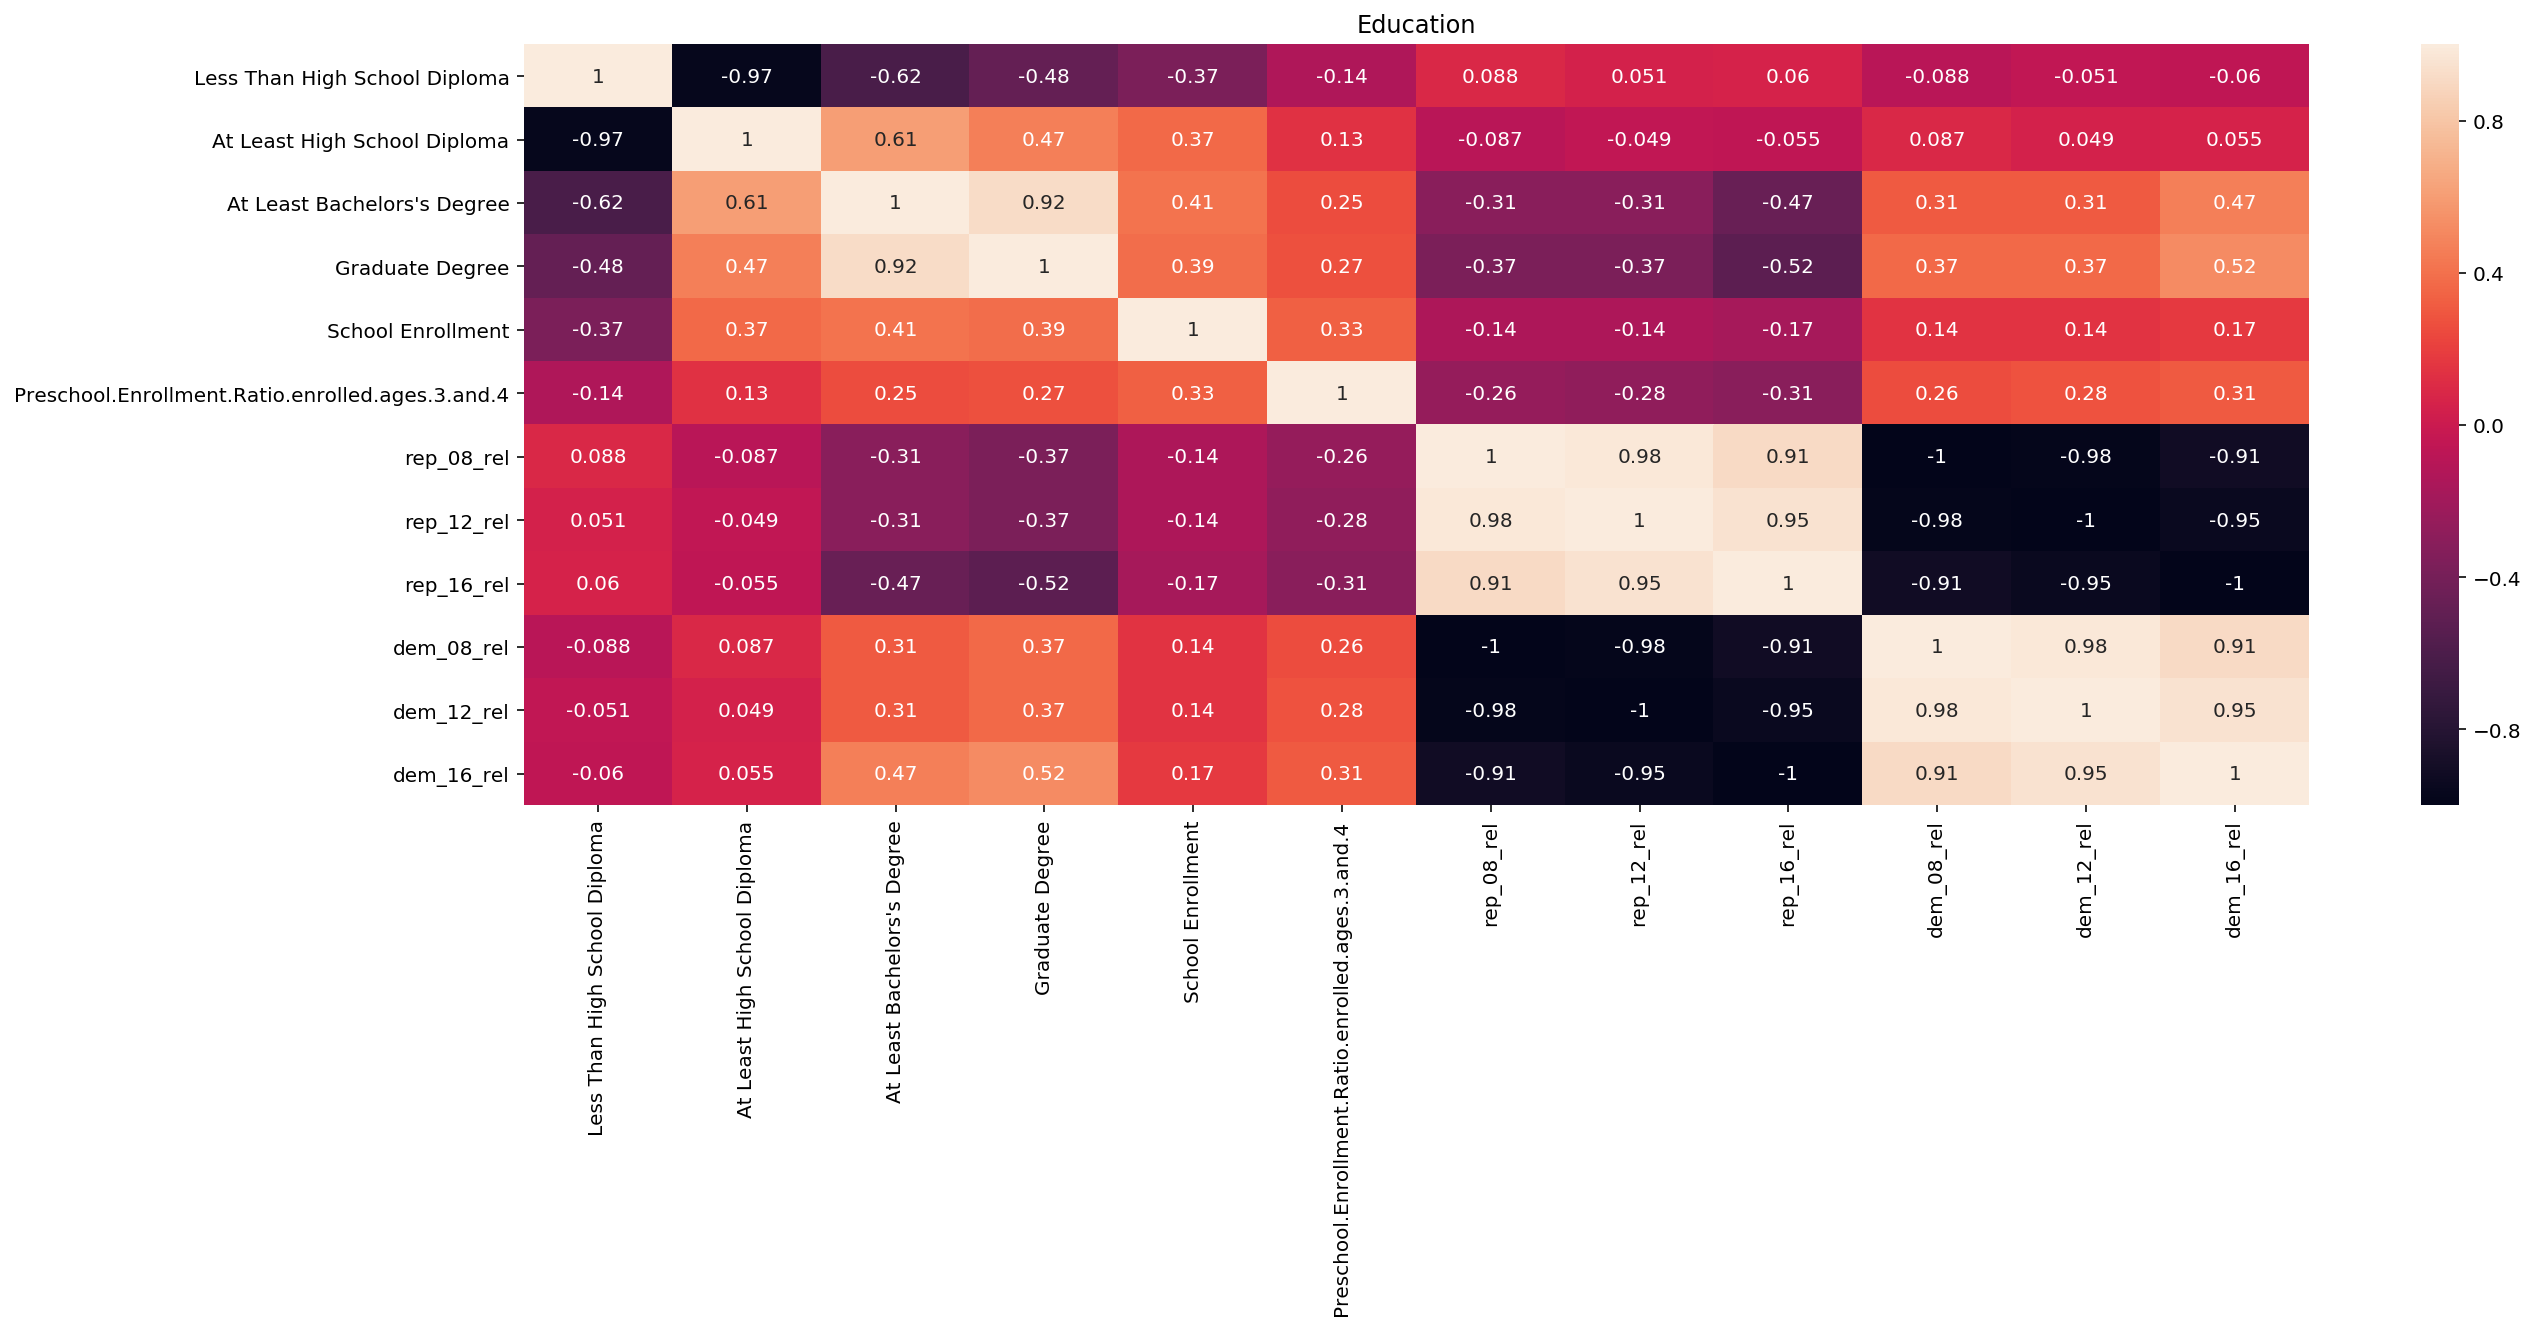

In [15]:
fig, gp = plt.subplots()
fig.set_size_inches(20,7)
gp = sns.heatmap(education.corr(), annot=True);
plt.title('Education');

 ### Employment

There is little correlation between employment data and voter share. However in all elections there seems to be a consistent positive correlation with unemployment, and a negative correlation with construction, extraction, maintenance & repair occupations for Democrats, and the reverse for Republicans.

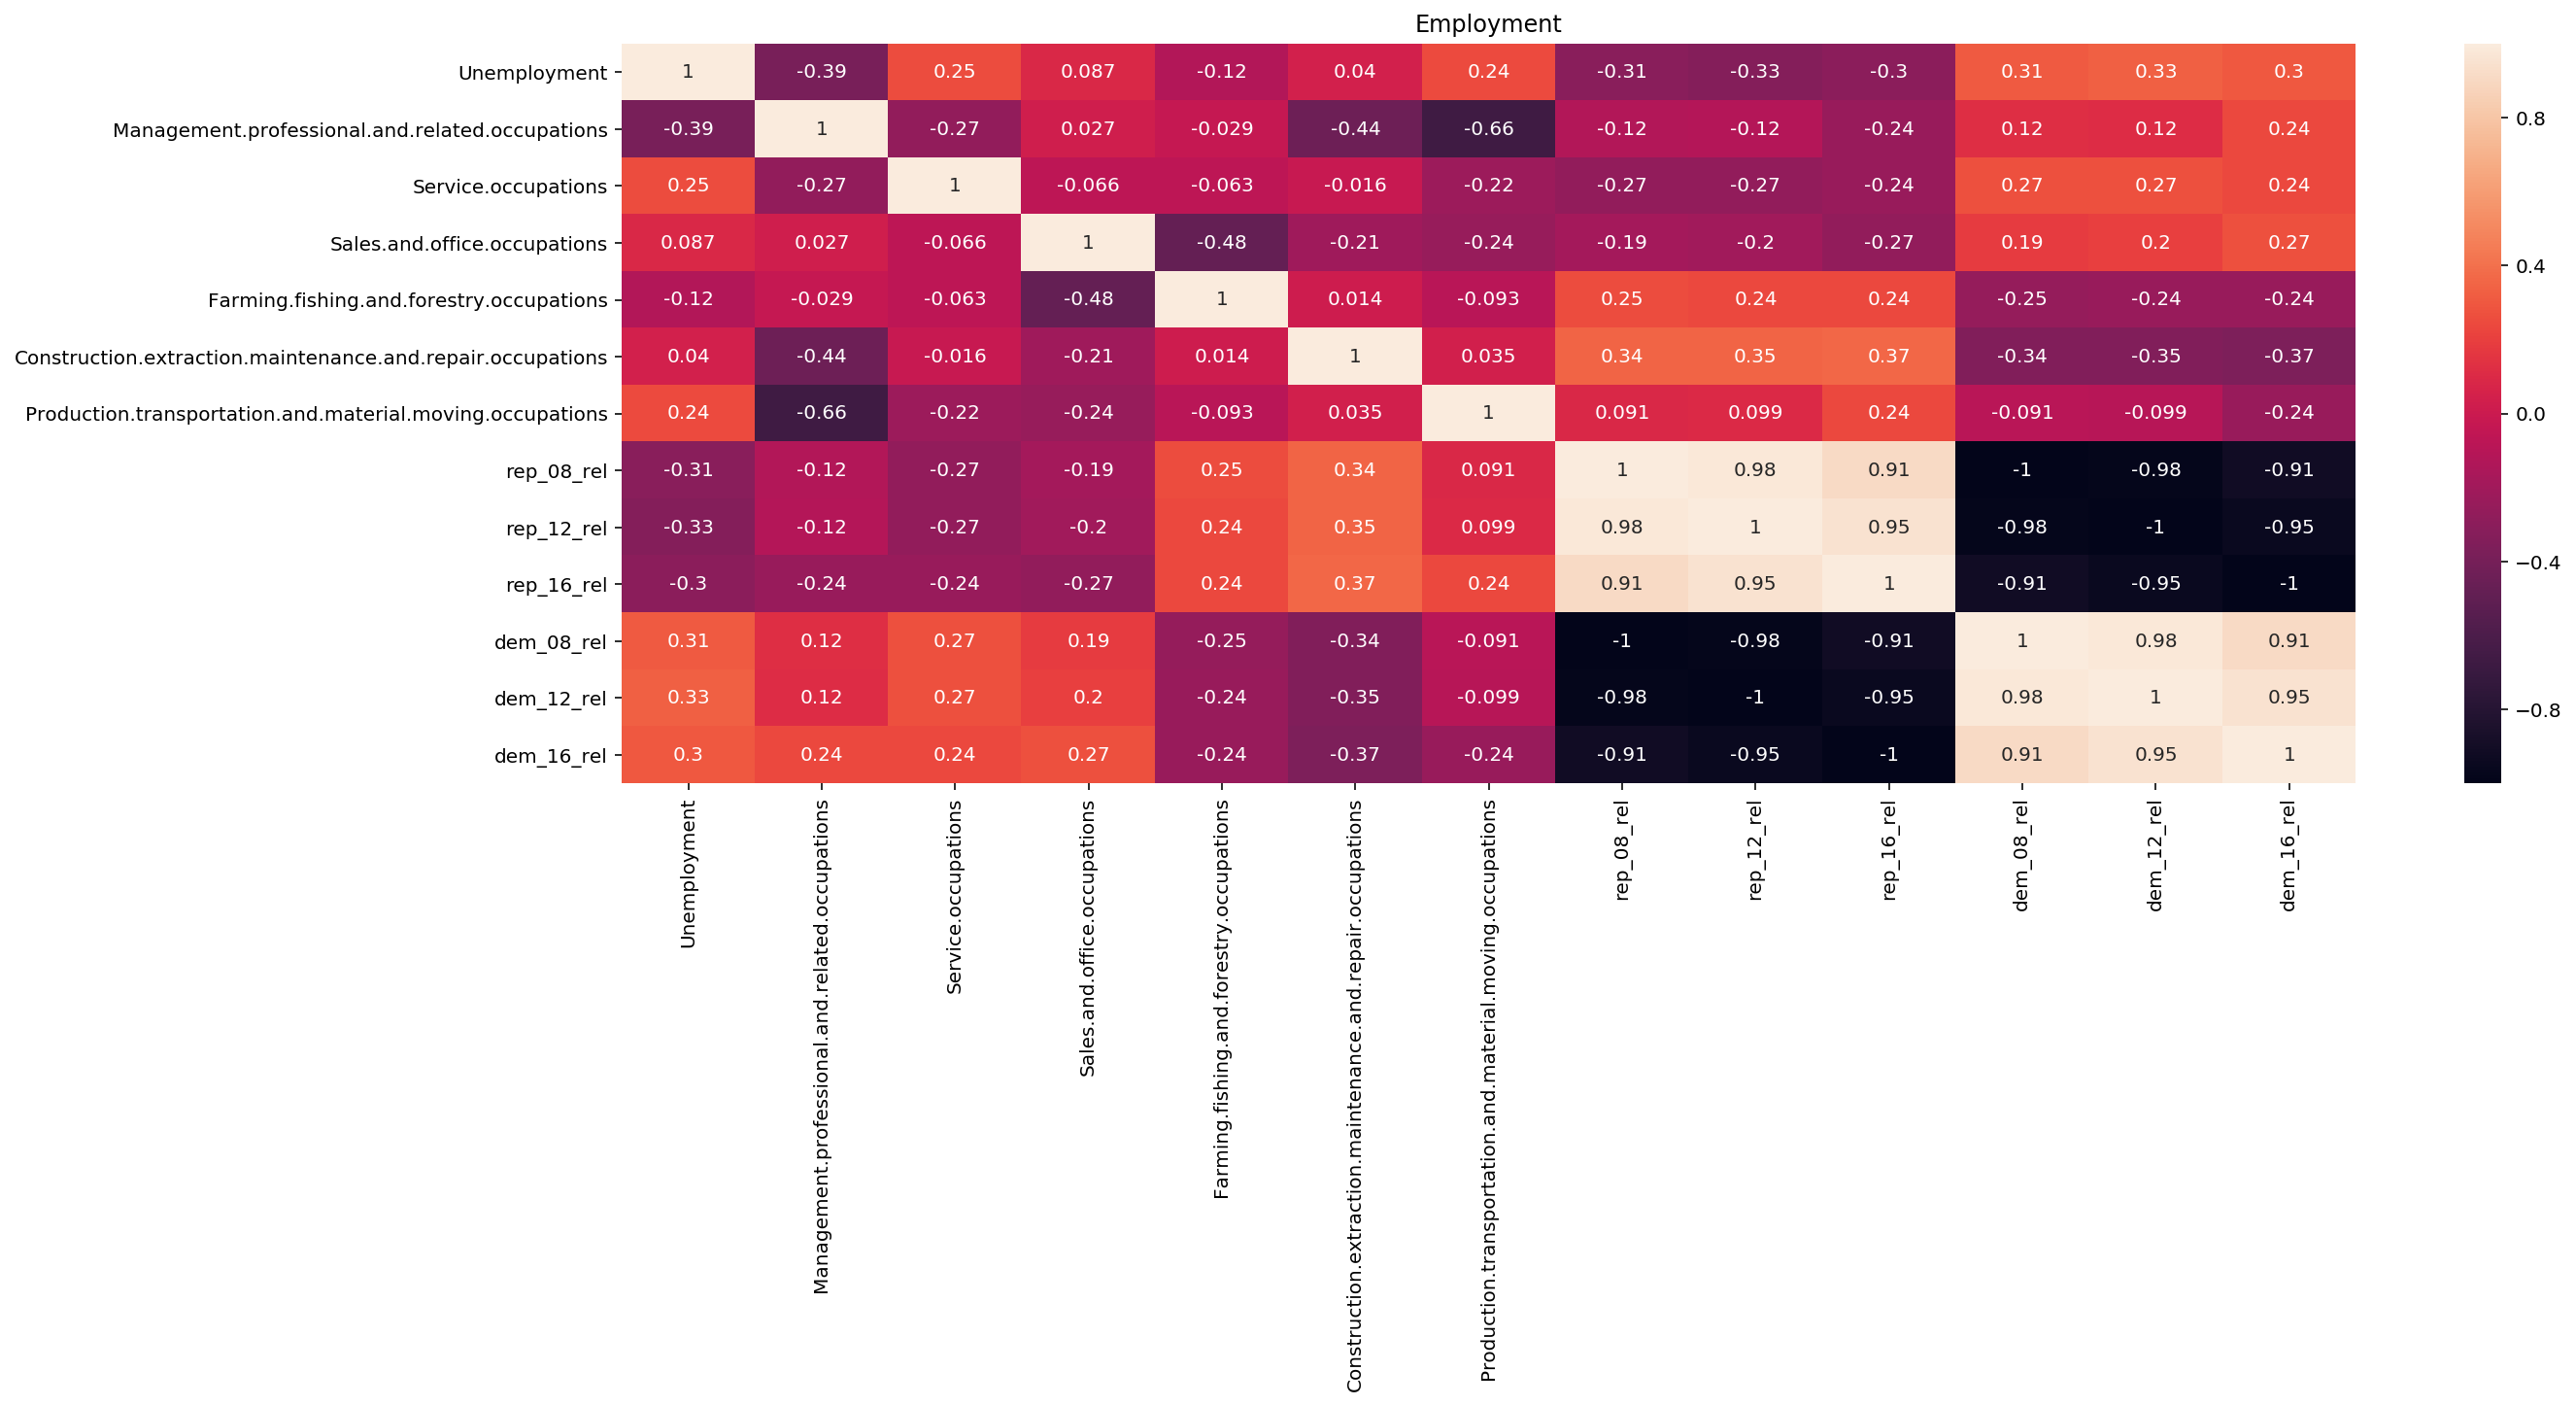

In [16]:
fig, gp = plt.subplots()
fig.set_size_inches(20,7)
gp = sns.heatmap(employment.corr(), annot=True);
plt.title('Employment');

### Economic

Children in single parent households show a negative correlation with Republican vote share across all elections. All other economic indicators show little correlation, however in the 2016 election the SIRE homogeneity shows a significantly higher positive correlation with Republicans than in previous years.

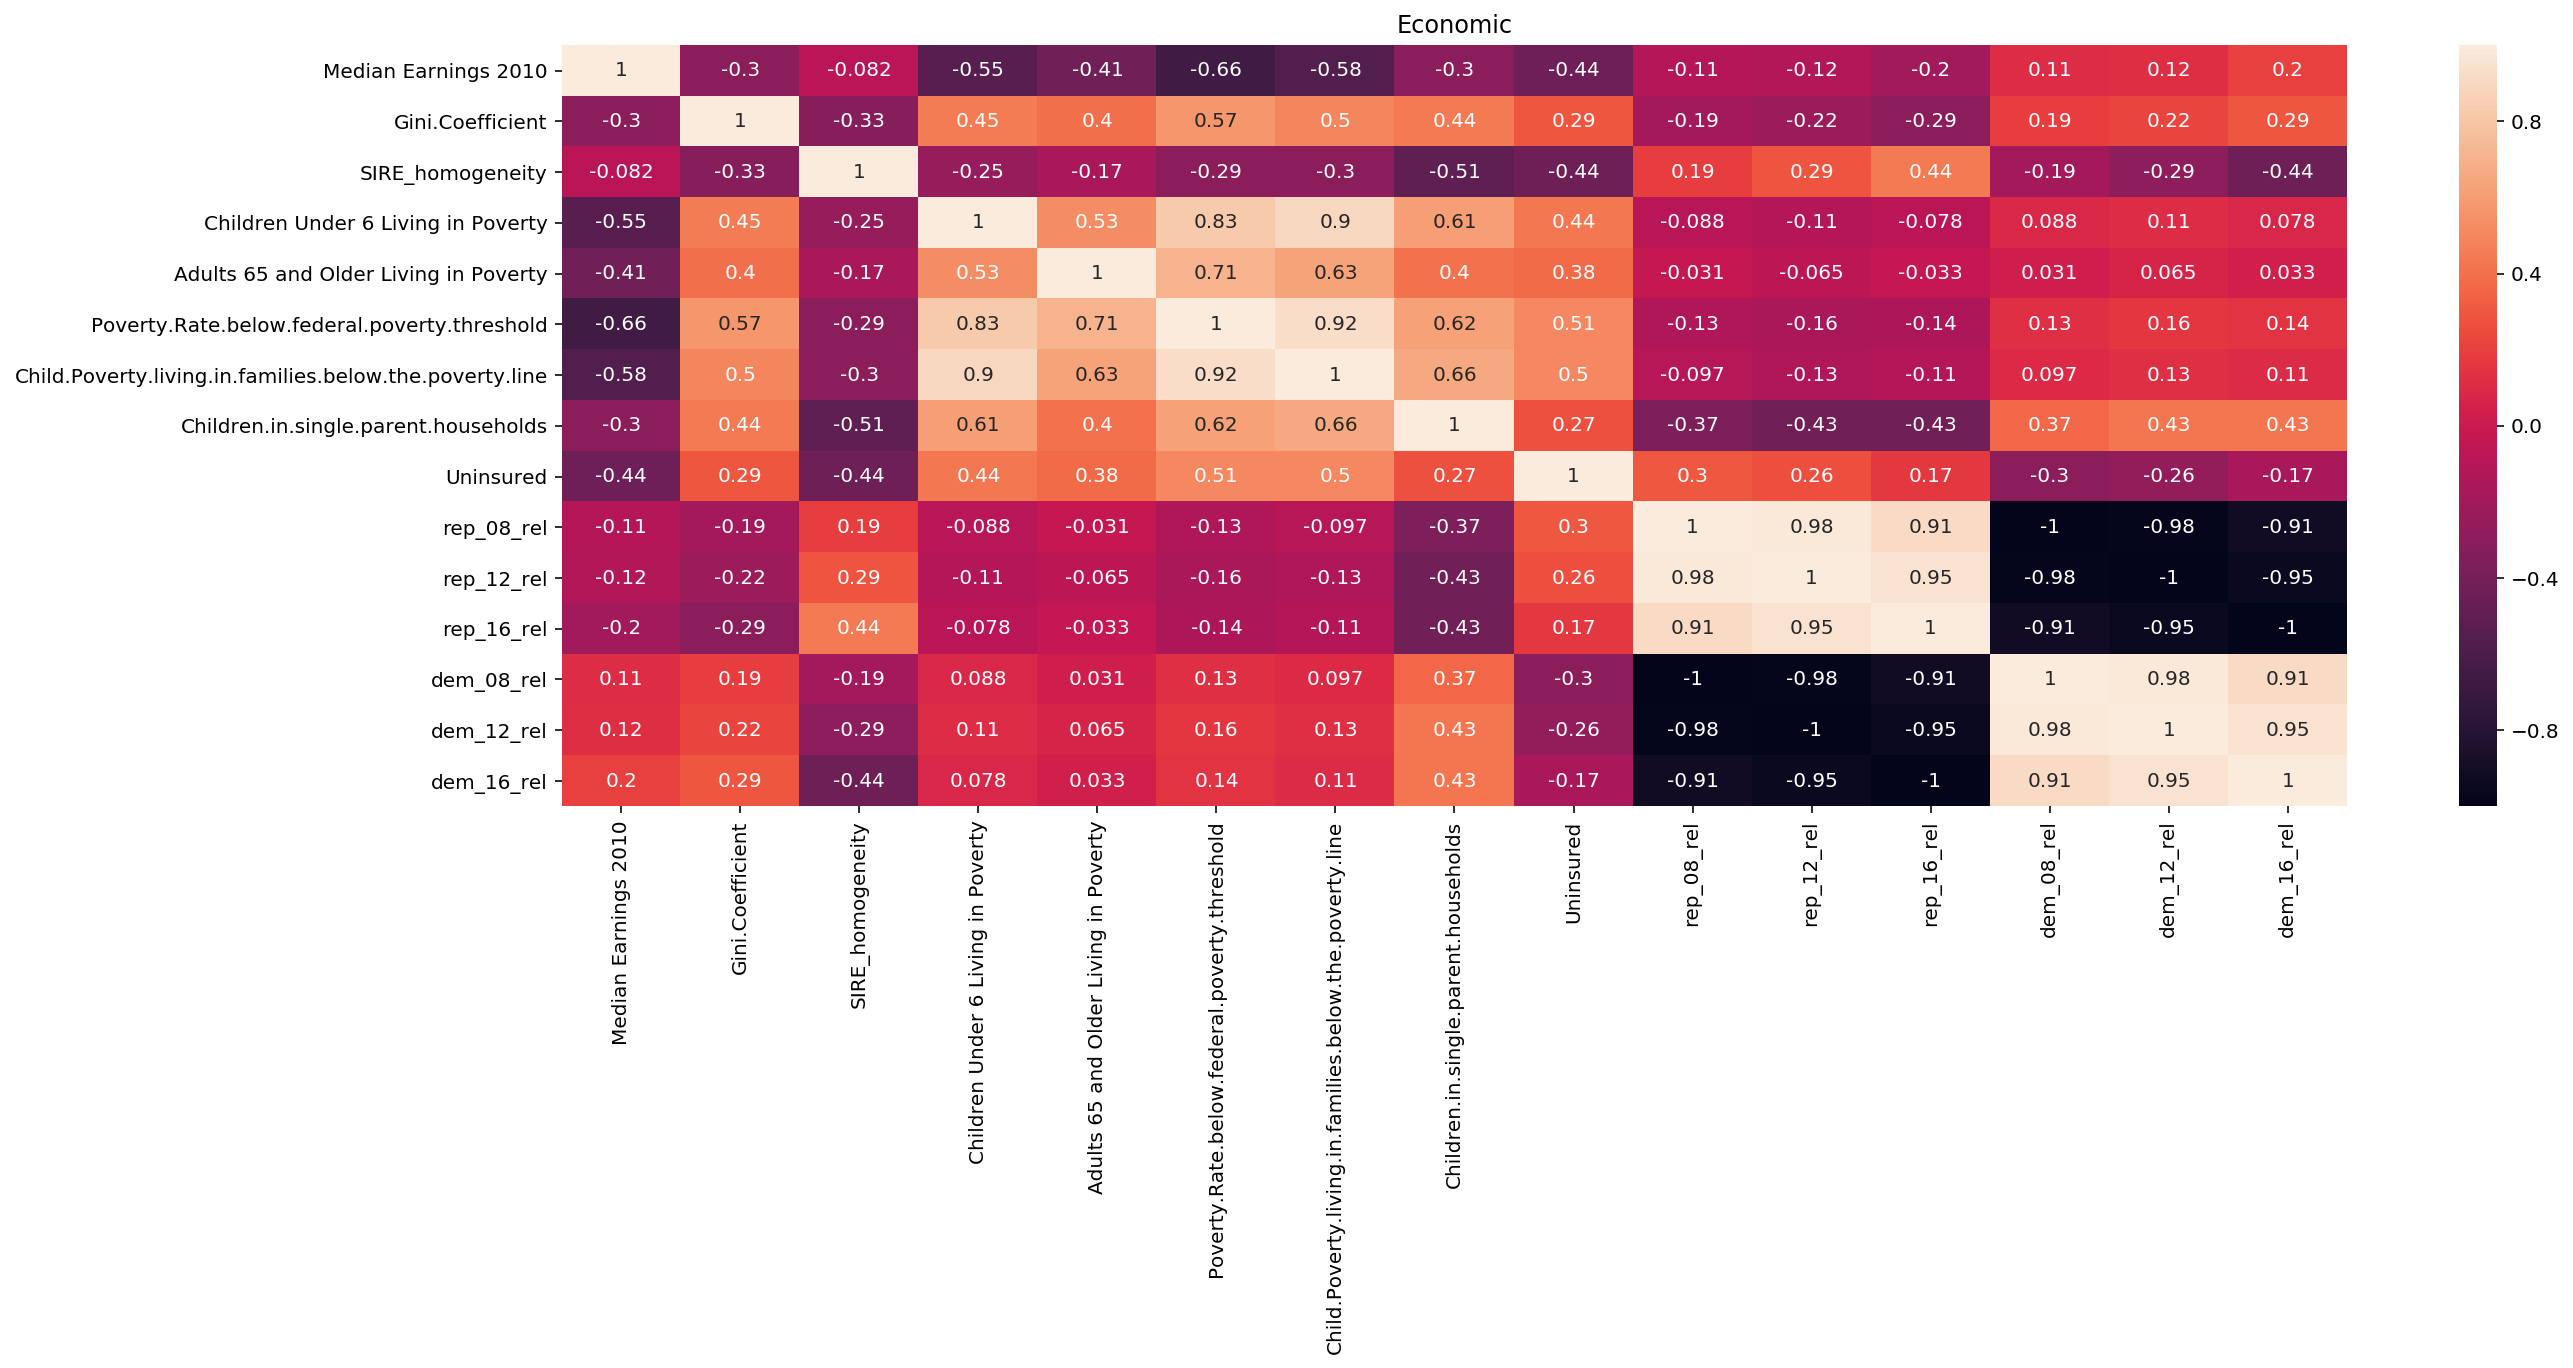

In [17]:
fig, gp = plt.subplots()
fig.set_size_inches(20,7)
gp = sns.heatmap(economic.corr(), annot=True);
plt.title('Economic');

### Health

There seems to be a positive correlation between sexually transmitted infections and Democrat vote share. Don't ask me why..

On a side note there are several interesting and intuitive correlations between the health-related features. For example: diabetes and adult obesity has a correlation coeficient of 0.72!

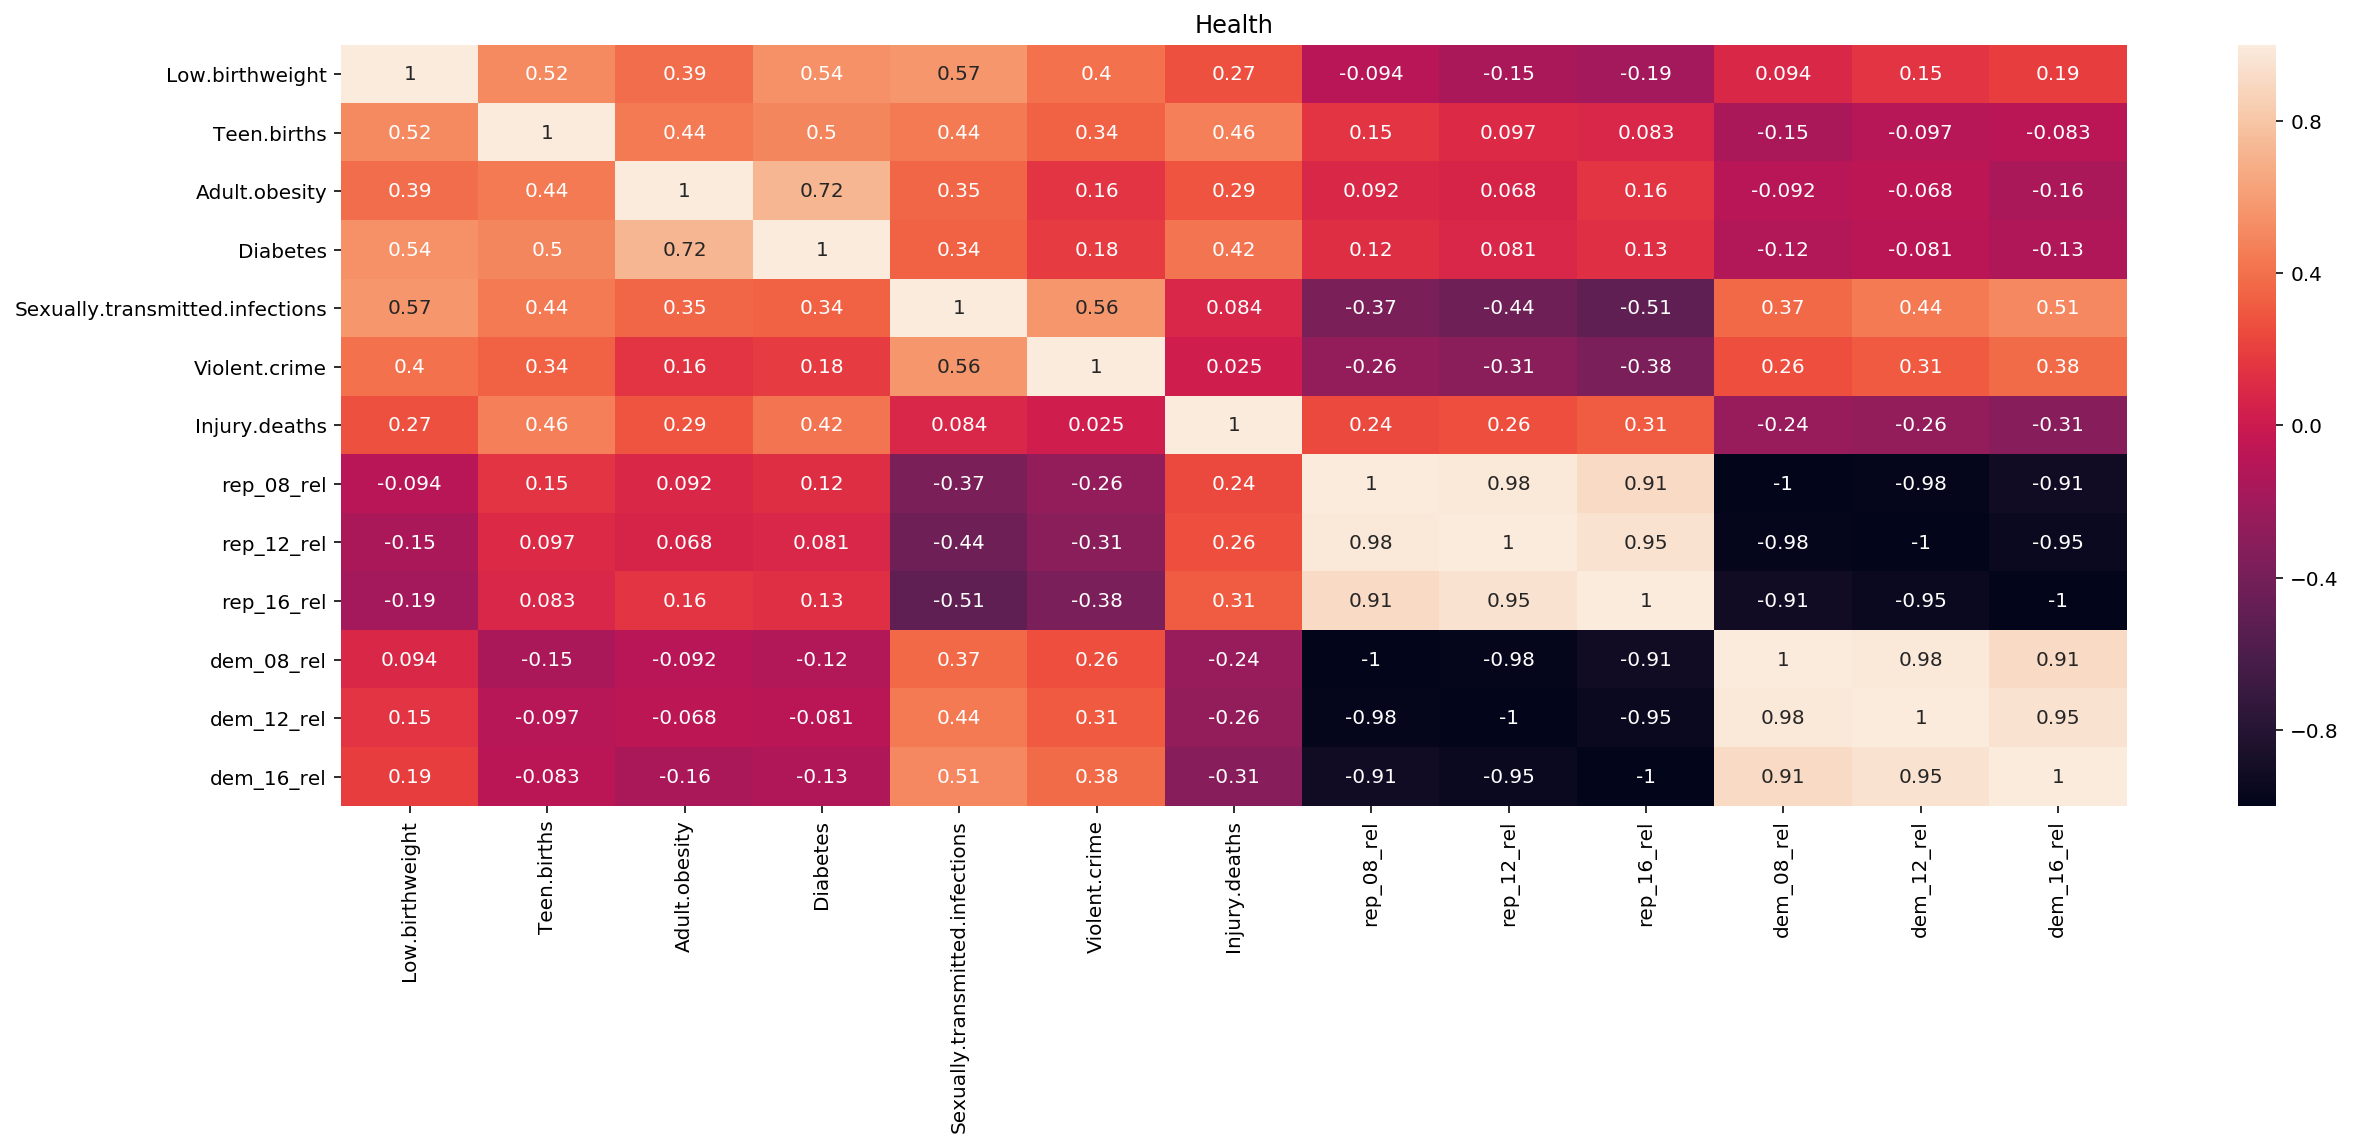

In [18]:
fig, gp = plt.subplots()
fig.set_size_inches(20,7)
gp = sns.heatmap(health.corr(), annot=True);
plt.title('Health');

### Demographic

The strongest correlations based on racial demographics for both Democrats and Republicans were with Black and White populations, both correlations are highest in the 2016 election.

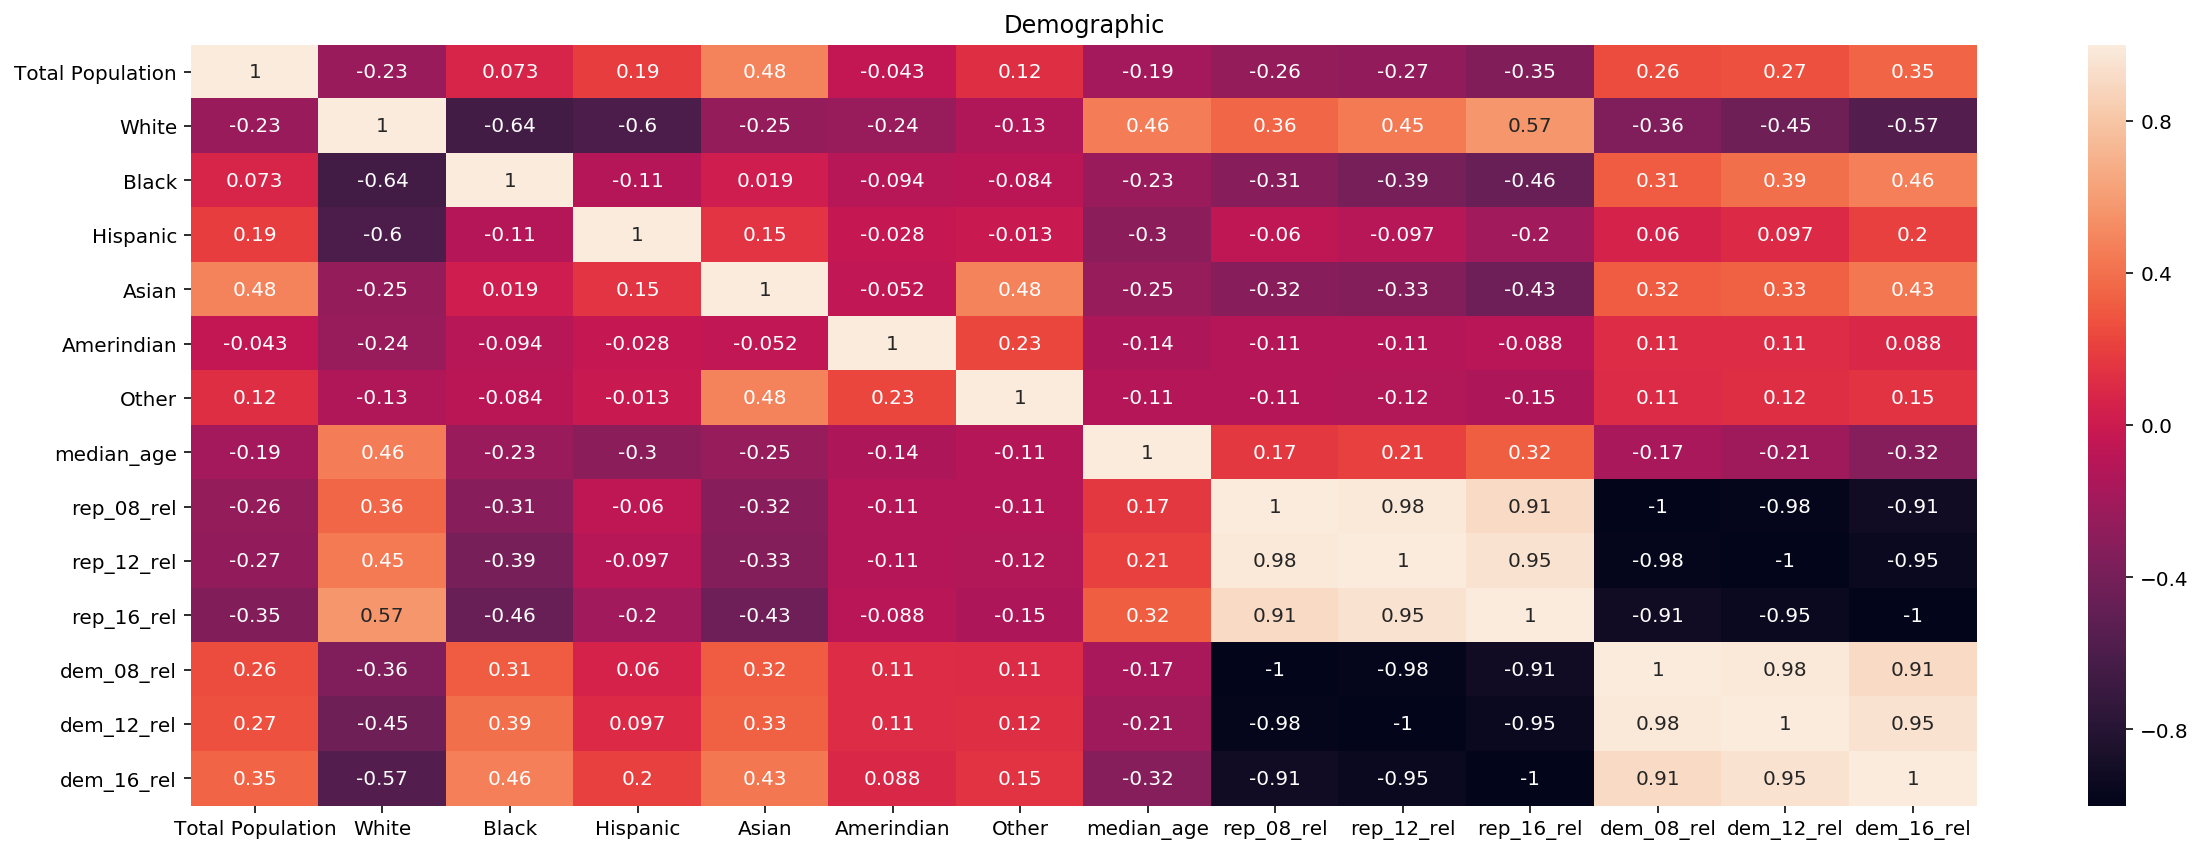

In [19]:
fig, gp = plt.subplots()
fig.set_size_inches(20,7)
gp = sns.heatmap(demographic.corr(), annot=True);
plt.title('Demographic');

Scatterplots were used to investigate this relationship further.

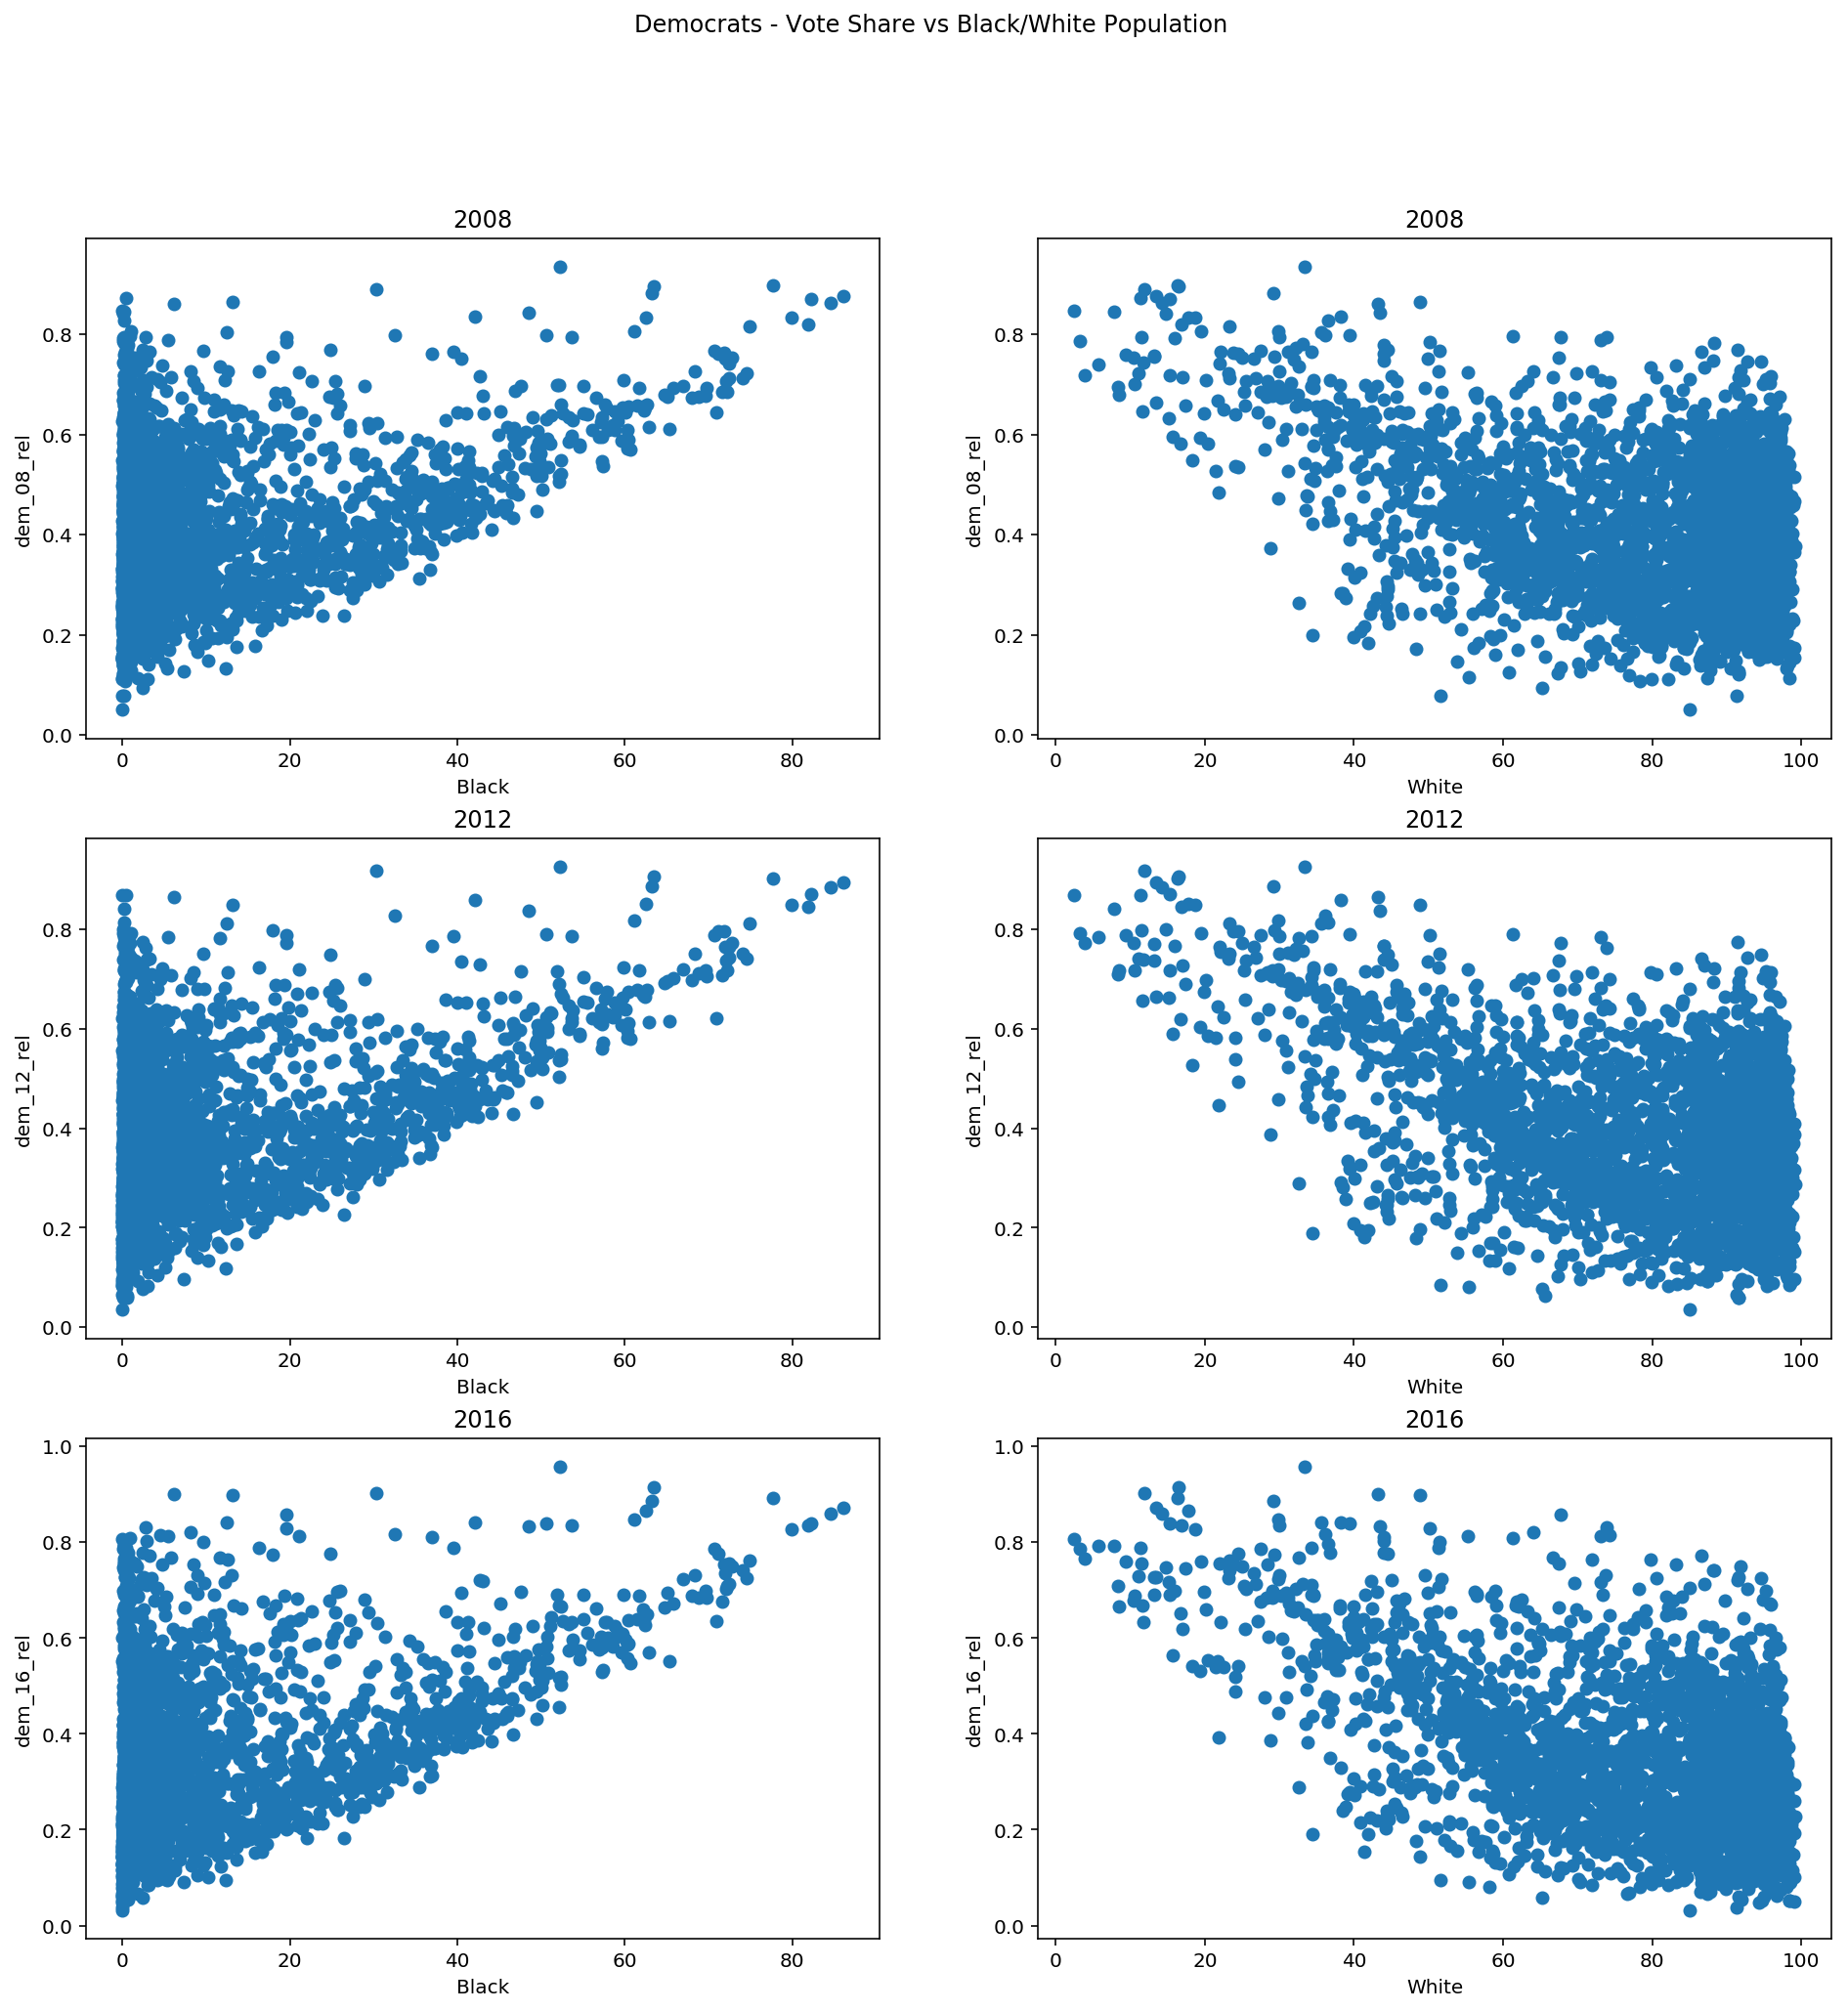

In [20]:
fig = plt.figure(figsize=(16, 16))
# set up subplot grid; how many rows and columns
gridspec.GridSpec(3,2)
gridspec

#Black
plt.subplot2grid((3,2), (0,0))
plt.scatter(df["Black"], df['dem_08_rel'])
plt.title("2008")
plt.xlabel("Black")
plt.ylabel('dem_08_rel')

#Black
plt.subplot2grid((3,2), (1,0))
plt.scatter(df["Black"], df['dem_12_rel'])
plt.title("2012")
plt.xlabel("Black")
plt.ylabel('dem_12_rel')

#Black
plt.subplot2grid((3,2), (2,0))
plt.scatter(df["Black"], df['dem_16_rel'])
plt.title("2016")
plt.xlabel("Black")
plt.ylabel('dem_16_rel')

#White
plt.subplot2grid((3,2), (0,1))
plt.scatter(df["White"], df['dem_08_rel'])
plt.title("2008")
plt.xlabel("White")
plt.ylabel('dem_08_rel')

#White
plt.subplot2grid((3,2), (1,1))
plt.scatter(df["White"], df['dem_12_rel'])
plt.title("2012")
plt.xlabel("White")
plt.ylabel('dem_12_rel')

#White
plt.subplot2grid((3,2), (2,1))
plt.scatter(df["White"], df['dem_16_rel'])
plt.title("2016")
plt.xlabel("White")
plt.ylabel('dem_16_rel')

fig.suptitle('Democrats - Vote Share vs Black/White Population')
plt.show()

The y-axis is the share of votes by the party in each election, and the x-axis is the population percentage that is black or white. Above are the charts for Democrats, and below, Republicans. 

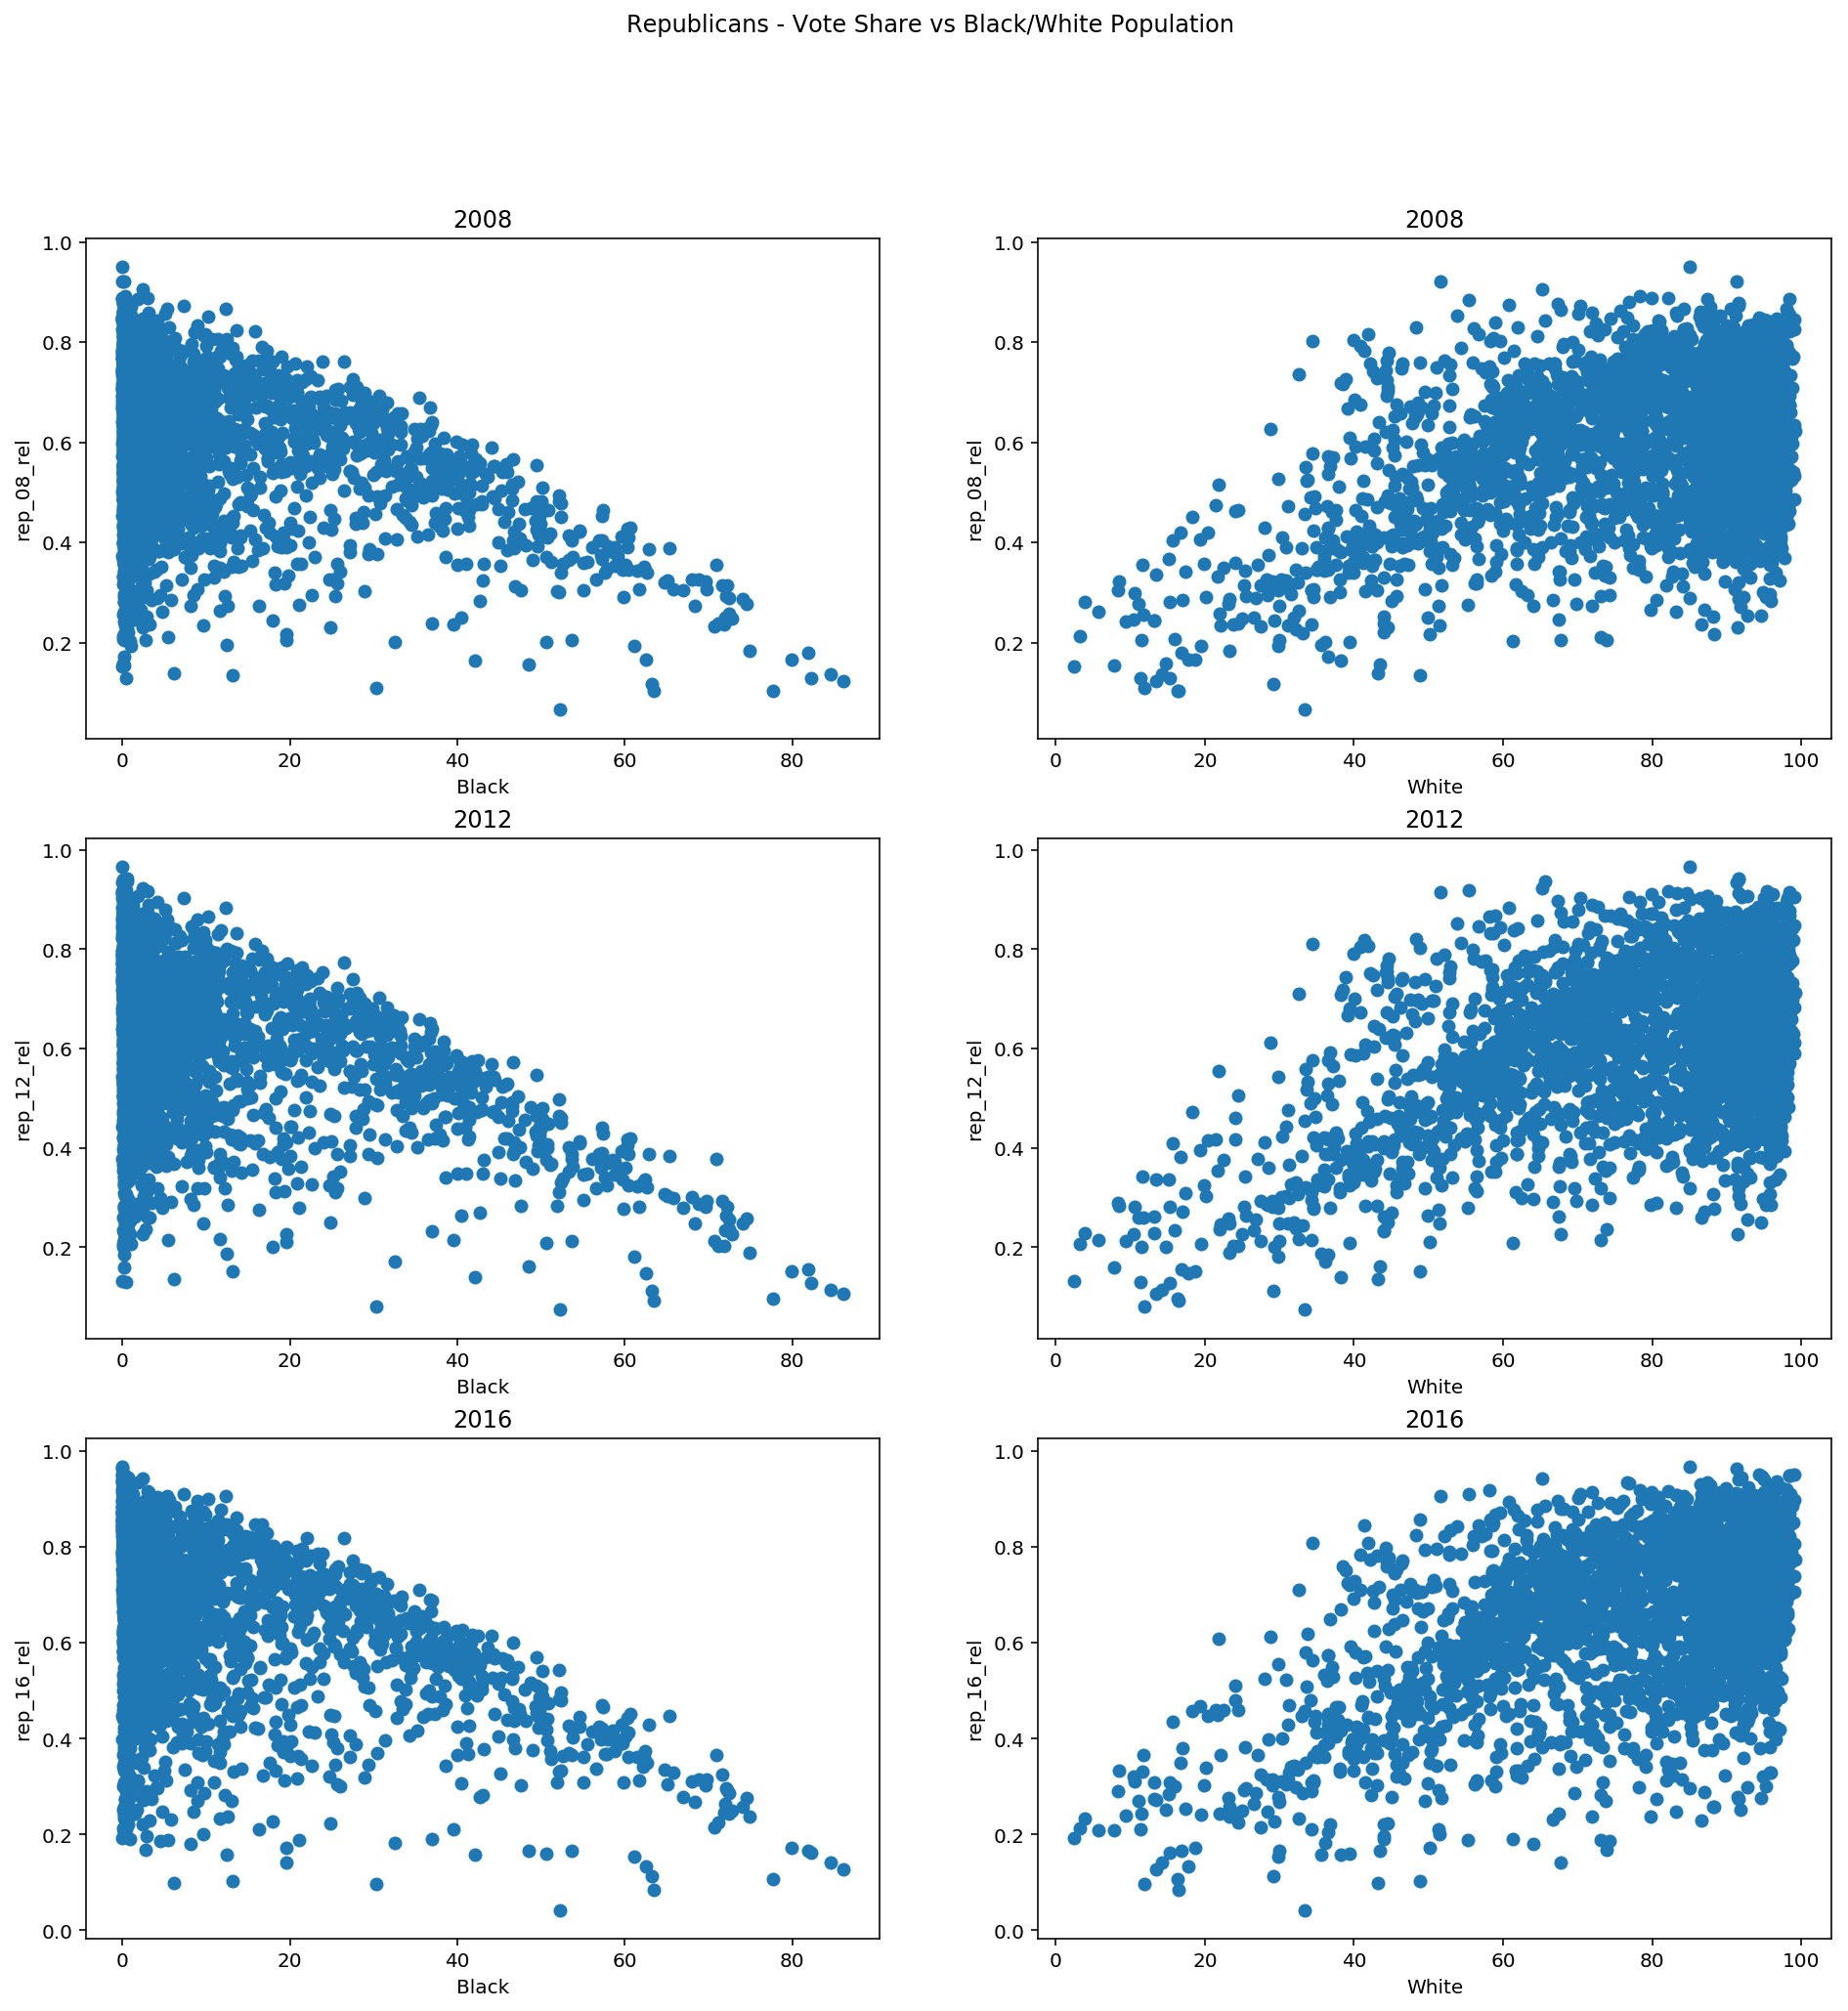

In [21]:
fig = plt.figure(figsize=(16, 16))
# set up subplot grid; how many rows and columns
gridspec.GridSpec(3,2)

#Black
plt.subplot2grid((3,2), (0,0))
plt.scatter(df["Black"], df['rep_08_rel'])
plt.title("2008")
plt.xlabel("Black")
plt.ylabel('rep_08_rel')

#Black
plt.subplot2grid((3,2), (1,0))
plt.scatter(df["Black"], df['rep_12_rel'])
plt.title("2012")
plt.xlabel("Black")
plt.ylabel('rep_12_rel')

#Black
plt.subplot2grid((3,2), (2,0))
plt.scatter(df["Black"], df['rep_16_rel'])
plt.title("2016")
plt.xlabel("Black")
plt.ylabel('rep_16_rel')

#White
plt.subplot2grid((3,2), (0,1))
plt.scatter(df["White"], df['rep_08_rel'])
plt.title("2008")
plt.xlabel("White")
plt.ylabel('rep_08_rel')

#White
plt.subplot2grid((3,2), (1,1))
plt.scatter(df["White"], df['rep_12_rel'])
plt.title("2012")
plt.xlabel("White")
plt.ylabel('rep_12_rel')

#White
plt.subplot2grid((3,2), (2,1))
plt.scatter(df["White"], df['rep_16_rel'])
plt.title("2016")
plt.xlabel("White")
plt.ylabel('rep_16_rel')

fig.suptitle('Republicans - Vote Share vs Black/White Population')
plt.show()

With the scatter plots we can see how strongly the proportion of black and white voters correlates with Democrat and Republican votes respectively.

## **Republican Vote Distribution**

A histogram is used to visualize changes in the distribution of county level Republican votes in each election.

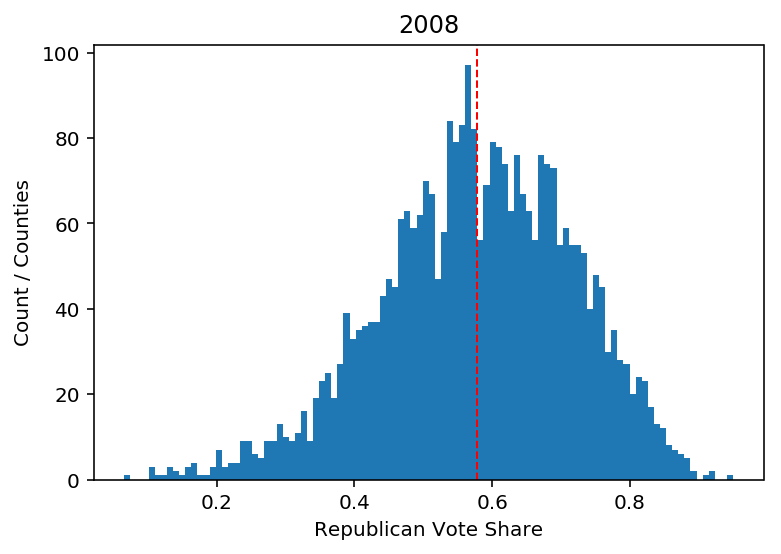

In [22]:
hist(df['rep_08_rel'],bins=100);
plt.title("2008");
plt.xlabel("Republican Vote Share");
plt.ylabel("Count / Counties");
plt.axvline(df['rep_08_rel'].mean(), color='red', linestyle='dashed', linewidth=1);

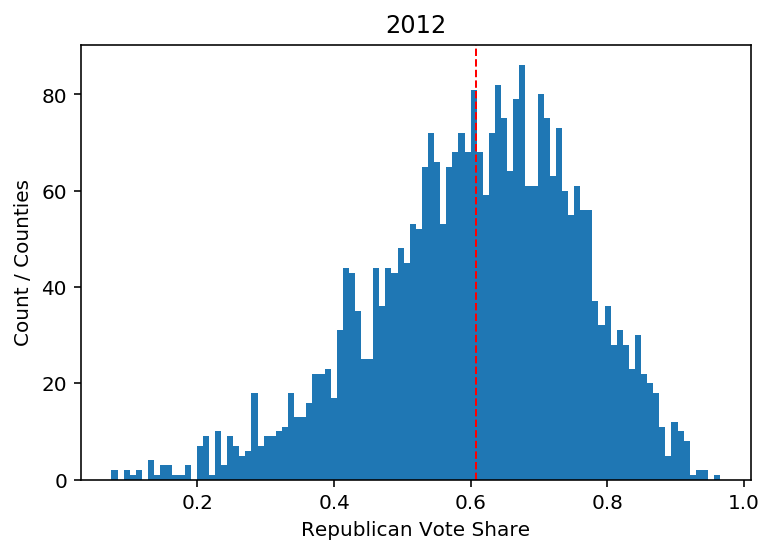

In [23]:
hist(df['rep_12_rel'],bins=100);
plt.title("2012");
plt.xlabel("Republican Vote Share");
plt.ylabel("Count / Counties");
plt.axvline(df['rep_12_rel'].mean(), color='red', linestyle='dashed', linewidth=1);

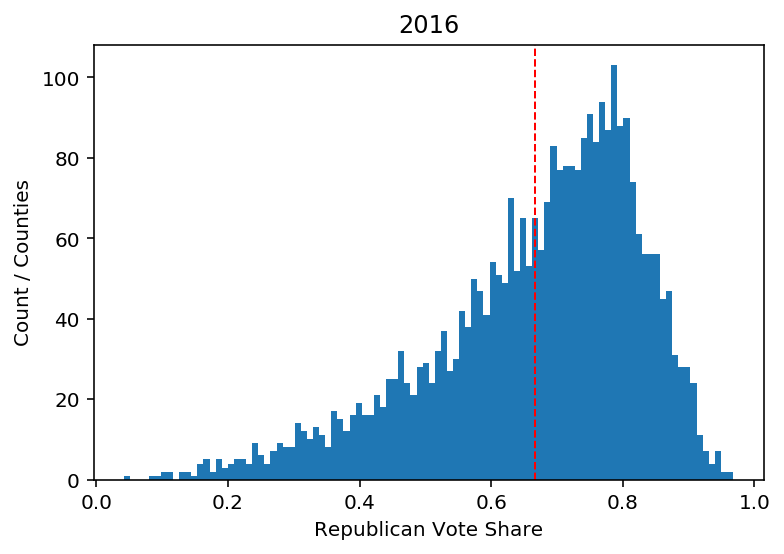

In [24]:
hist(df['rep_16_rel'],bins=100);
plt.title("2016");
plt.xlabel("Republican Vote Share");
plt.ylabel("Count / Counties");
plt.axvline(df['rep_16_rel'].mean(), color='red', linestyle='dashed', linewidth=1);

The 2008 and 2012 election results for Republicans were similar to each other in terms of the shape of the distribution, the center, and the skewness. In both years the data is normally distributed, with a center and mean near 0.6, with very little skew. However in 2016, the chart is skewed to the right and the mean is closer to 0.7.

Independent T-Tests were conducted to assess the mean difference across elections. In all cases the p-value was less than 0.05 so we can reject the null hypothesis that the three elections are similar to each other.

In [25]:
stats.ttest_ind(df['rep_08_rel'],df['rep_12_rel'])

Ttest_indResult(statistic=-8.218384073738271, pvalue=2.488070826243874e-16)

In [26]:
stats.ttest_ind(df['rep_12_rel'],df['rep_16_rel'])

Ttest_indResult(statistic=-15.021039152926344, pvalue=4.0184413756152137e-50)

In [27]:
stats.ttest_ind(df['rep_08_rel'],df['rep_16_rel'])

Ttest_indResult(statistic=-23.388548224471588, pvalue=5.065316279234161e-116)

<a id='eng'></a>

# 3. Feature Engineering
***

Based on the data analysis above, the features selected for modeling were those variables in the education, employment, and demographic categories. These features demonstrated the strongest correlations with vote shares, and were not tainted by null values. Additionally, constraining the feature space could help simplify the models and improve generalizability.

From these categories, there were a total of 21 independent variables, which were aggregated by state using the mean of the independent variables, and the sum of the votes. A new column was created with the binary outcome of the election for each state, based on the total votes.

### Train/Test Split

In [28]:
# Calculate the mean
state_df = df.groupby('State').mean()

# Aggregated vote data
vote_data = pd.DataFrame(df.groupby(['State']).sum())


independent_variables = ['Less Than High School Diploma', 'At Least High School Diploma', "At Least Bachelors's Degree", 'Graduate Degree', 'School Enrollment',
                         'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4','Unemployment', 'Management.professional.and.related.occupations', 'Service.occupations', 
                         'Sales.and.office.occupations', 'Farming.fishing.and.forestry.occupations', 'Construction.extraction.maintenance.and.repair.occupations',
                         'Production.transportation.and.material.moving.occupations', 'Total Population', 'White', 'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 
                         'median_age']

x_variables = state_df[independent_variables]

# ind_variables = state_data[['Unemployment', "At Least Bachelors's Degree", 'Graduate Degree', 'Black', 'White']]

votes_2008 = vote_data[['Democrats 08 (Votes)','Republicans 08 (Votes)']]
votes_2012 = vote_data[['Democrats 12 (Votes)','Republicans 12 (Votes)']]

frames = [x_variables, votes_2008, votes_2012]

model_data = pd.concat(frames, axis = 1, sort=True)

model_data['RepublicanVictory08'] = np.where(model_data['Democrats 08 (Votes)'] < model_data['Republicans 08 (Votes)'], 1,0)
model_data['RepublicanVictory12'] = np.where(model_data['Democrats 12 (Votes)'] < model_data['Republicans 12 (Votes)'], 1,0)

Next the data from the 2008 and 2012 elections were combined. The combined dataset containing the sum of the votes, the weighted mean of the independent variables, and the binary outcomes aggregated by state will be used for the training dataset. The test set will contain the aggregated variables, without any votes. The models will therefore attempt to predict the 2016 result, using the 2008 and 2012 data and results.

In [29]:
print(vote_data.columns)

Index(['Fips', 'Precincts', 'Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.sing

In [30]:
model_data_08 = model_data.drop('RepublicanVictory12', axis=1)
model_data_08 = model_data_08.rename(index=str, columns={"RepublicanVictory08": "RepublicanVictory"})

model_data_12 = model_data.drop('RepublicanVictory08', axis=1)
model_data_12 = model_data_12.rename(index=str, columns={"RepublicanVictory12": "RepublicanVictory"})

combo = [model_data_08, model_data_12]
mdf = pd.concat(combo, axis=0)

# Train/Test Split
x_train = mdf[independent_variables]
y_train = mdf['RepublicanVictory']

x_test = x_variables

# y test
votes_2016 = vote_data[['votes16_clintonh','votes16_trumpd']]
test_frames = [x_variables, votes_2016]
test_data = pd.concat(test_frames, axis = 1, sort=True)
test_data['RepublicanVictory16'] = np.where(test_data['votes16_clintonh'] < test_data['votes16_trumpd'], 1,0)
test_data_16 = test_data.rename(index=str, columns={"RepublicanVictory16": "RepublicanVictory"})
y_test = test_data_16['RepublicanVictory']

### Normalization

The features were normalized using MinMax; the data was scaled to a bounded range (0 and 1). Since the input variables are measured in different units, this approach enables them to be modeled more realistically. There will be smaller standard deviations in the data, and the effect of outliers will be diminished.

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
print(f'train: {x_train.shape}', f'test: {x_test.shape}')

train: (100, 21) test: (50, 21)


<a id='models'></a>

# 4. Predictive Modeling
***

### Logistic Regression

The simplest model that could be used to predict the outcome of the election is a logistic regression; the outcome of an election is a type of binary prediction that is well suited to logistic regression.

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/Users/thomaskojoaddaquay/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
prediction = logreg.predict(x_test)

ec = pd.read_csv('electiondata/ec.csv')
outcome = pd.DataFrame({"RepublicanVictory": prediction})
result = [ec, outcome]

election_results = pd.concat(result, axis = 1, sort=False)
election_results['RepublicanVotes'] = np.where(election_results['RepublicanVictory'] == 1, election_results['EC_votes'], 0)
election_results['DemocratVotes'] = np.where(election_results['RepublicanVictory'] == 0, election_results['EC_votes'], 0)

demvotes = election_results.DemocratVotes.sum()
repvotes = election_results.RepublicanVotes.sum()

if repvotes > demvotes:
    print(f'The model predicts Republicans will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}') 
else:
    print(f'The model predicts Democrats will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}.') 

print(f'The classification accuracy is: {logreg.score(x_test, y_test):.1%}')

The model predicts Democrats will win the 2016 election. 
 Electoral College Votes 
 Democrats: 307 
 Republicans: 228.
The classification accuracy is: 80.0%


To make the prediction, the outcomes for each state were combined with the number of electoral college votes awarded, in order to calculate the total electoral votes.

In [35]:
election_results.head(10)

,State,EC_votes,RepublicanVictory,RepublicanVotes,DemocratVotes
0,Alabama,9,1.0,9,0
1,Alaska,3,0.0,0,3
2,Arizona,11,1.0,11,0
3,Arkansas,6,0.0,0,6
4,California,55,0.0,0,55
5,Colorado,9,0.0,0,9
6,Connecticut,7,0.0,0,7
7,Delaware,3,0.0,0,3
8,District of Columbia,3,0.0,0,3
9,Florida,29,1.0,29,0


The model incorrectly predicted that the Democrats will win the 2016 election, with an unremarkable classification accuracy. 

## Random Forest

We may be able to make better predictions using random forest model.

To find the best hyperparameters for the model, GridSearchCV is used to implement an exhaustive search over a range of parameters.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Automatic Hyperparameter optimization for XGB model
grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'n_estimators': np.arange(10,220,10),
        'max_depth': np.arange(10,110,10)
    },
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=5,
    verbose=6
)
grid_search_rf.fit(x_train, y_train)

print(grid_search_rf.best_estimator_.fit)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.1min


<bound method BaseForest.fit of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>


[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  1.2min finished
/Users/thomaskojoaddaquay/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
forrest = RandomForestClassifier(max_depth=10, n_estimators=30, random_state=None)

In [38]:
forrest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
forrest_prediction = forrest.predict(x_test)

In [40]:
ec = pd.read_csv('electiondata/ec.csv')
outcome = pd.DataFrame({"RepublicanVictory": forrest_prediction})
result = [ec, outcome]

election_results = pd.concat(result, axis = 1, sort=False)
election_results['RepublicanVotes'] = np.where(election_results['RepublicanVictory'] == 1, election_results['EC_votes'], 0)
election_results['DemocratVotes'] = np.where(election_results['RepublicanVictory'] == 0, election_results['EC_votes'], 0)

demvotes = election_results.DemocratVotes.sum()
repvotes = election_results.RepublicanVotes.sum()

if repvotes > demvotes:
    print(f'The model predicts Republicans will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}') 
else:
    print(f'The model predicts Democrats will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}.') 

print(f'The classification accuracy is: {forrest.score(x_test, y_test):.1%}')

The model predicts Republicans will win the 2016 election. 
 Electoral College Votes 
 Democrats: 261 
 Republicans: 274
The classification accuracy is: 88.0%


The model was wrong about the election outcome, but was slightly better at predicting which states would win electoral college votes. It possibly overfitted to the training data.

## Ensemble: Gradient Boosted Trees

Maybe we can't see the forest for the trees.. Let's try to enhance the performance of the forest by bundling it with 2 boosted decision stumps; Extreme Gradient Boosting and AdaBoost. 

In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [42]:
%%time
# Automatic Hyperparameter optimization for AdaBoost model
grid_search_ada = GridSearchCV(
    AdaBoostClassifier(),
    param_grid={
        'n_estimators': np.arange(20,220,20),
        'learning_rate': np.logspace(-2, 0, 3)
    },
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=5,
    verbose=6
)
grid_search_ada.fit(x_train, y_train)

# Automatic Hyperparameter optimization for XGB model
grid_search_xgb = GridSearchCV(
    XGBClassifier(),
    param_grid={
        'max_depth': np.arange(10,60,10),
        'n_estimators': np.arange(1,20,4),
        'learning_rate': np.logspace(-2, 0, 3)
        
    },
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=5,
    verbose=6
)
grid_search_xgb.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.8s finished
/Users/thomaskojoaddaquay/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 367 ms, sys: 11.6 ms, total: 379 ms
Wall time: 7.43 s


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    0.5s finished
/Users/thomaskojoaddaquay/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
print(f'AdaBoost Parameters: {grid_search_ada.best_estimator_.fit}')
print(f'XGBoost Parameters: {grid_search_xgb.best_estimator_.fit}')

AdaBoost Parameters: <bound method AdaBoostClassifier.fit of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=140, random_state=None)>
XGBoost Parameters: <bound method XGBClassifier.fit of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=13,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>


Now that we've found the optimal parameters for all the models, we can build this ensemble.

In [44]:
from sklearn.ensemble import VotingClassifier

#Models
forrest = RandomForestClassifier(max_depth=10, n_estimators=30, random_state=None)
ada = AdaBoostClassifier(n_estimators=140, learning_rate=0.01)
boost = XGBClassifier(max_depth=10, n_estimators=13, learning_rate=0.1, objective='binary:logistic')

#Supermodel

ensemble = VotingClassifier(estimators=[('Adaboost Model', ada),\
                                        ('Random Forest', forrest),\
                                        ('Gradient Boosting', boost)],\
                                        voting="soft")

ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('Adaboost Model', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=140, random_state=None)), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto'...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [45]:
ensemble_prediction = ensemble.predict(x_test)

In [46]:
ec = pd.read_csv('electiondata/ec.csv')
outcome = pd.DataFrame({"RepublicanVictory": ensemble_prediction})
result = [ec, outcome]

election_results = pd.concat(result, axis = 1, sort=False)
election_results['RepublicanVotes'] = np.where(election_results['RepublicanVictory'] == 1, election_results['EC_votes'], 0)
election_results['DemocratVotes'] = np.where(election_results['RepublicanVictory'] == 0, election_results['EC_votes'], 0)

demvotes = election_results.DemocratVotes.sum()
repvotes = election_results.RepublicanVotes.sum()

if repvotes > demvotes:
    print(f'The model predicts Republicans will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}') 
else:
    print(f'The model predicts Democrats will win the 2016 election. \n Electoral College Votes \n Democrats: {demvotes} \n Republicans: {repvotes}.') 

print(f'The classification accuracy is: {ensemble.score(x_test, y_test):.1%}')

The model predicts Democrats will win the 2016 election. 
 Electoral College Votes 
 Democrats: 290 
 Republicans: 245.
The classification accuracy is: 86.0%


Looks like this fancy model didn't do much better. In the next election analysis I'll explore whether neural nets can predict the upcoming 2020 election.